# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Read data

In [2]:
train_path =file_path = 'D:/Downloads/learning/deep learning/datasets/Credit_Scoring/cs-training.csv'
data=pd.read_csv(train_path)

In [3]:
data.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data.shape

(150000, 12)

# Data Preprocessing

In [5]:
print(data.columns)

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [6]:
data.drop(columns='Unnamed: 0', inplace=True)

In [7]:
data.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [10]:
data.duplicated().sum()

609

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
# Replace missing values with mean
#data_df.fillna(data_df.mean(), inplace=True)
column_mean = data['MonthlyIncome'].mean()
data['MonthlyIncome'].fillna(column_mean, inplace=True)
column_mean1 = data['NumberOfDependents'].mean()
data['NumberOfDependents'].fillna(column_mean1, inplace=True)

In [14]:
#Drop rows with missing values
#data_df.dropna(inplace=True)

In [15]:
data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [16]:
# Normalize numerical features
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
# Convert the scaled data back to a DataFrame
data= pd.DataFrame(data_scaled, columns=data.columns)

# visualizations

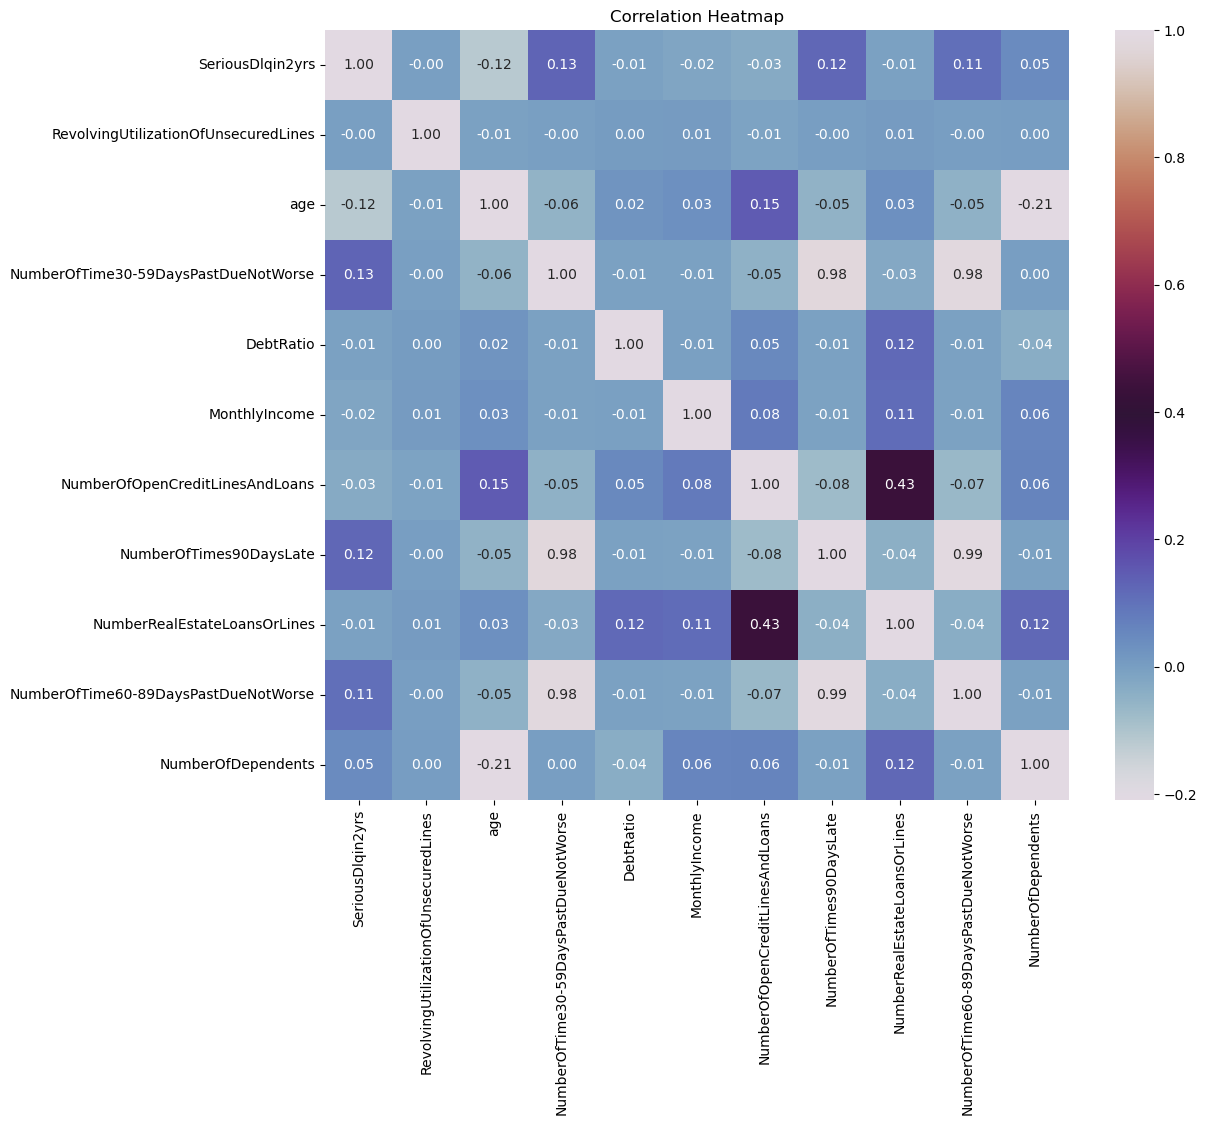

In [17]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='twilight', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

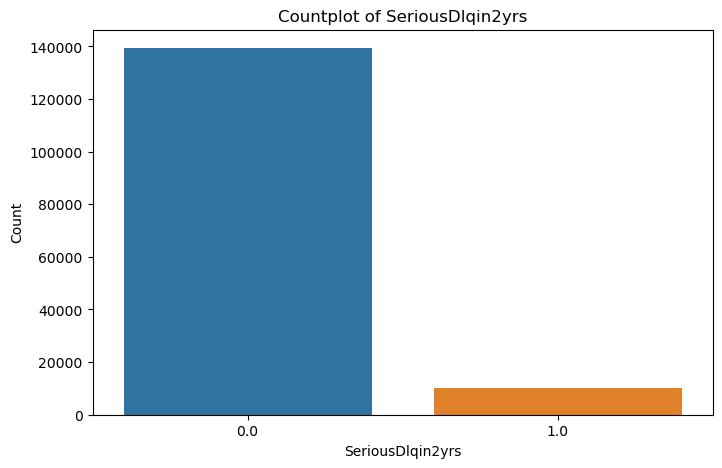

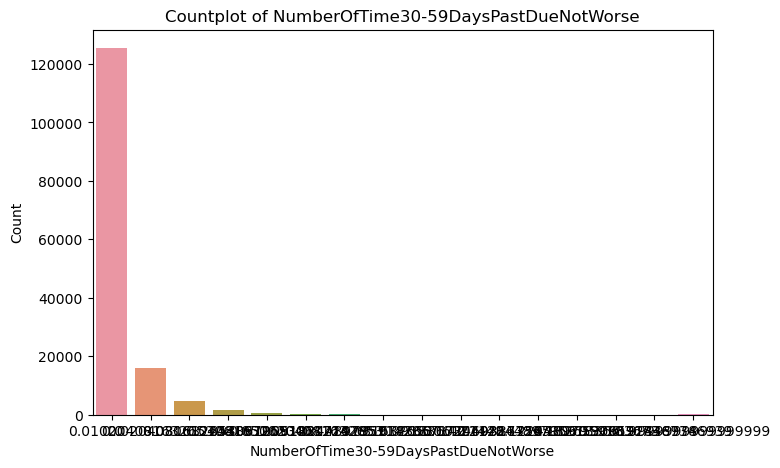

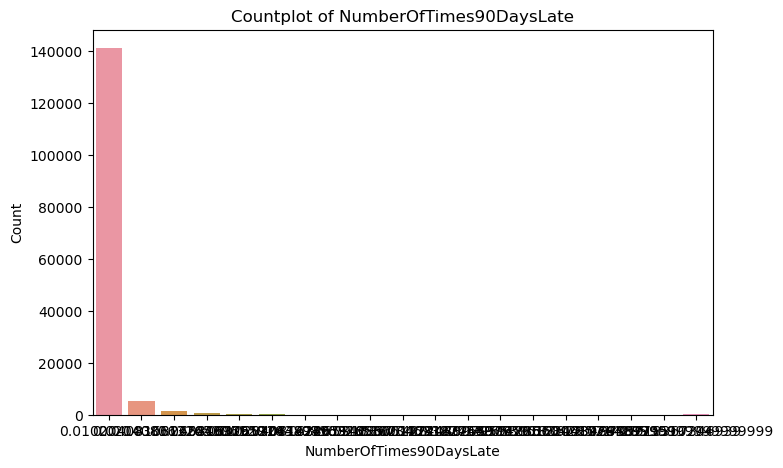

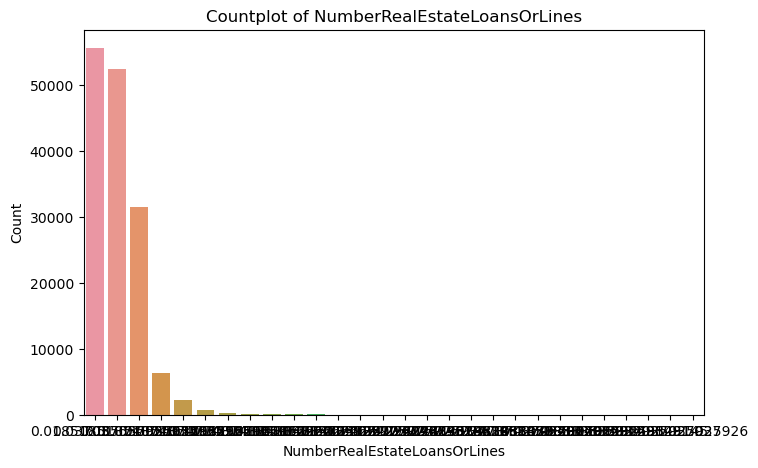

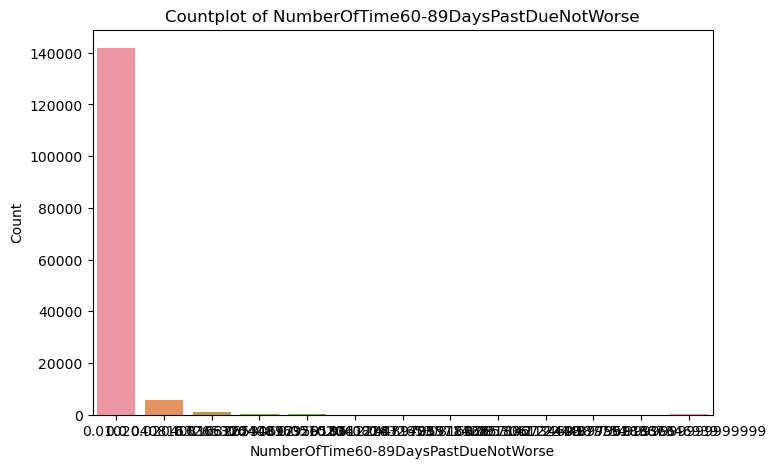

In [18]:
# Countplot for categorical columns
categorical_columns = ['SeriousDlqin2yrs', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=data)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Countplot of {column}')
    plt.show()




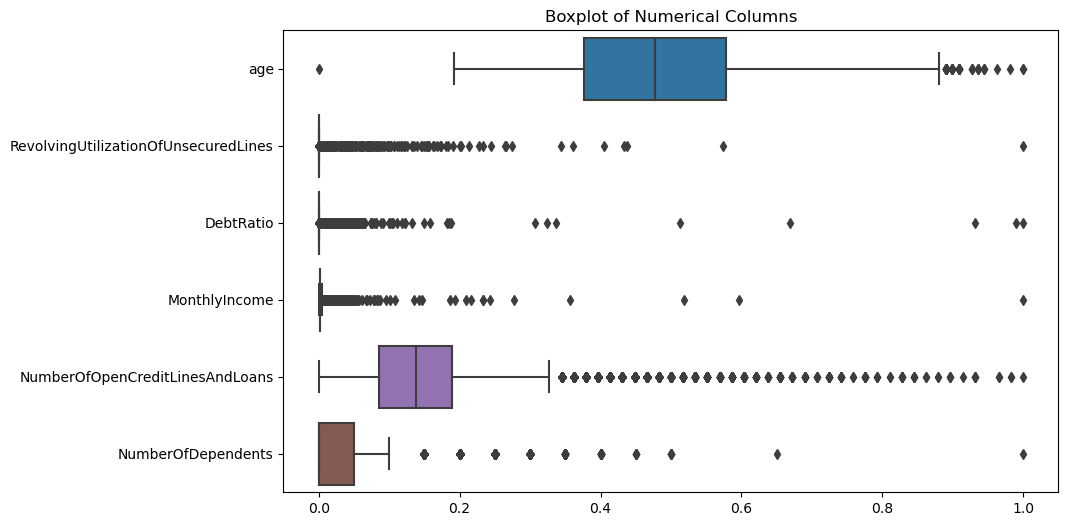

In [19]:
# Boxplot for outlier detection
numerical_columns = ['age', 'RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfDependents']
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_columns], orient='h')
plt.title('Boxplot of Numerical Columns')
plt.show()


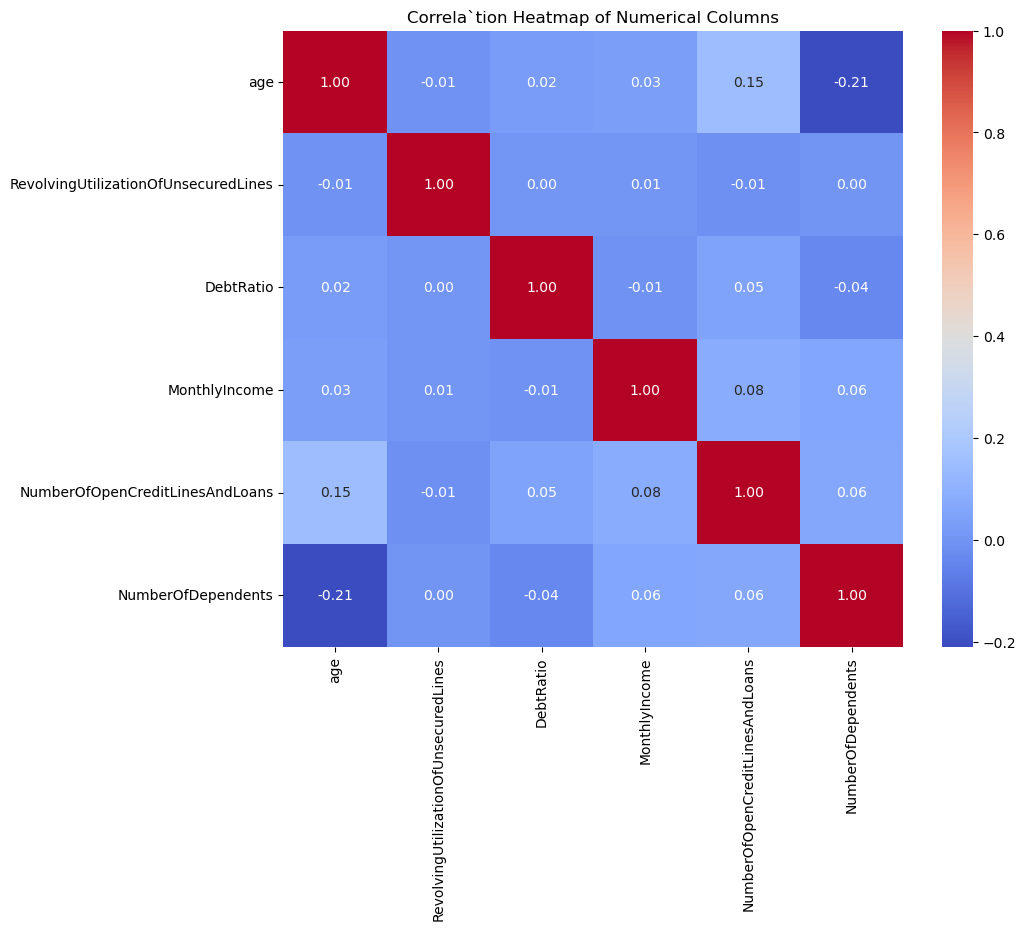

In [20]:
# Correlation heatmap
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correla`tion Heatmap of Numerical Columns')
plt.show()

# split the data

In [21]:
X=data.drop(columns=['SeriousDlqin2yrs'])
y=data['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# RandomForestClassifier

In [22]:
from sklearn.metrics import classification_report
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9351822928287742
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     41869
         1.0       0.52      0.18      0.26      2949

    accuracy                           0.94     44818
   macro avg       0.73      0.58      0.61     44818
weighted avg       0.92      0.94      0.92     44818



# SVM Model

In [23]:
from sklearn.svm import SVC
# Train the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.934267481815342
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97     41869
         1.0       0.52      0.01      0.02      2949

    accuracy                           0.93     44818
   macro avg       0.73      0.51      0.50     44818
weighted avg       0.91      0.93      0.90     44818



# LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.934267481815342
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97     41869
         1.0       0.52      0.01      0.02      2949

    accuracy                           0.93     44818
   macro avg       0.73      0.51      0.50     44818
weighted avg       0.91      0.93      0.90     44818

